In [1]:
dados ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/Conv1d/Dominio do Tempo/dados_tempo.npy'
rotulos ='/home/dev/PycharmProjects/FallDetection/conv/mobiact/rotulos_tempo.npy'

import numpy as np
X = np.load(dados)
y = np.load(rotulos)

In [2]:
def rede_cnn_1d(X,y,i):

    from sklearn.model_selection import train_test_split

    # Dividindo os dados em conjunto de treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

    # Dividindo o conjunto de treinamento em conjunto de treinamento e validação
    X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

    from keras.utils import to_categorical
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    y_val = to_categorical(y_val)

    from tensorflow import keras
    from keras.models import Sequential
    from keras.layers import Dense, Dropout,Conv1D,Flatten,MaxPooling1D

    kernel_size = 5

    model = keras.Sequential()


    model.add(Conv1D(filters=107, kernel_size=kernel_size, activation='relu', input_shape=(400,1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=214, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=428, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=856, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(291, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    historico = model.fit(X_train,y_train,batch_size= 32,epochs = 20, validation_data = (X_val,y_val),verbose =1)

    model.summary()

    import matplotlib.pyplot as plt


    acuracia_treino = historico.history['accuracy'] 
    acuracia_val = historico.history['val_accuracy']

    epochs = range(1, len(acuracia_treino)+1) 

    plt.plot(epochs,acuracia_treino, "-g", label="Acurácia Dados de Treino") 
    plt.plot(epochs,acuracia_val, "-b", label = "Acurácia Dados de Validação")
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel('Acurácia')
    plt.show()

    import numpy as np
    import matplotlib.pyplot as plt
    import itertools
    from sklearn.metrics import confusion_matrix

    # Obtendo as probabilidades das classes previstas
    y_pred_probs = model.predict(X_test)

    # Obtendo as classes previstas
    y_pred = np.argmax(y_pred_probs, axis=1)

    # Obtendo as classes reais
    y_true = np.argmax(y_test, axis=1)

    # Calculando a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)

    # Plotando a matriz de confusão
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    tick_marks = np.arange(0, 2)
    plt.xticks(tick_marks, rotation=90)
    plt.yticks(tick_marks)

    # Adicionando os números nas células da matriz
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Rótulo Real')
    plt.xlabel('Rótulo Previsto')
    plt.show()

    from sklearn.metrics import classification_report


    target_names = np.arange(0, 2).astype(str)
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    from sklearn.metrics import matthews_corrcoef
    mcc = matthews_corrcoef(y_true, y_pred)
    print(f'MCC = {mcc}')
    
    from sklearn.metrics import roc_curve, roc_auc_score
    # Calcula a AUC
    roc_auc = roc_auc_score(y_true, y_pred)
    # Calcula a curva ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # Plota a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falso Positivo')
    plt.ylabel('Taxa de Verdadeiro Positivo')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()
    
    # Salvar o modelo em formato HDF5
    model.save(f'Cnn1D_tempo_treinado_{i}.h5')






2023-07-26 10:31:44.087641: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 10:31:44.125704: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-26 10:31:44.126470: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 10:31:44.826488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-07-26 10:31:45.638736: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Do

Epoch 1/20
302/302 [==============================] - 80s 260ms/step - loss: 0.1609 - accuracy: 0.9602 - val_loss: 0.0923 - val_accuracy: 0.9645
Epoch 2/20
302/302 [==============================] - 78s 259ms/step - loss: 0.0683 - accuracy: 0.9785 - val_loss: 0.0341 - val_accuracy: 0.9891
Epoch 3/20
302/302 [==============================] - 75s 250ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0443 - val_accuracy: 0.9838
Epoch 4/20
302/302 [==============================] - 78s 259ms/step - loss: 0.0262 - accuracy: 0.9913 - val_loss: 0.0200 - val_accuracy: 0.9941
Epoch 5/20
302/302 [==============================] - 75s 249ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0682 - val_accuracy: 0.9763
Epoch 6/20
302/302 [==============================] - 76s 251ms/step - loss: 0.0221 - accuracy: 0.9920 - val_loss: 0.0229 - val_accuracy: 0.9919
Epoch 7/20
302/302 [==============================] - 77s 255ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 0.0128 - val_ac

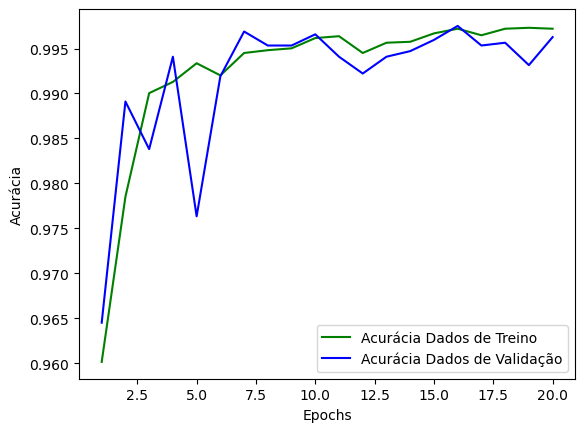

101/101 [==============================] - 4s 36ms/step


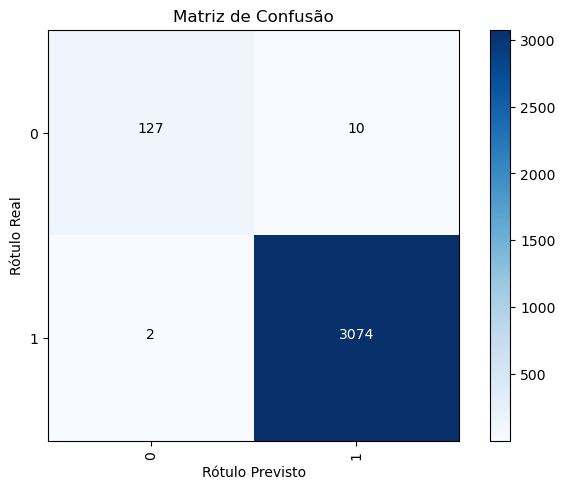

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       137
           1       1.00      1.00      1.00      3076

    accuracy                           1.00      3213
   macro avg       0.99      0.96      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9534103138762887


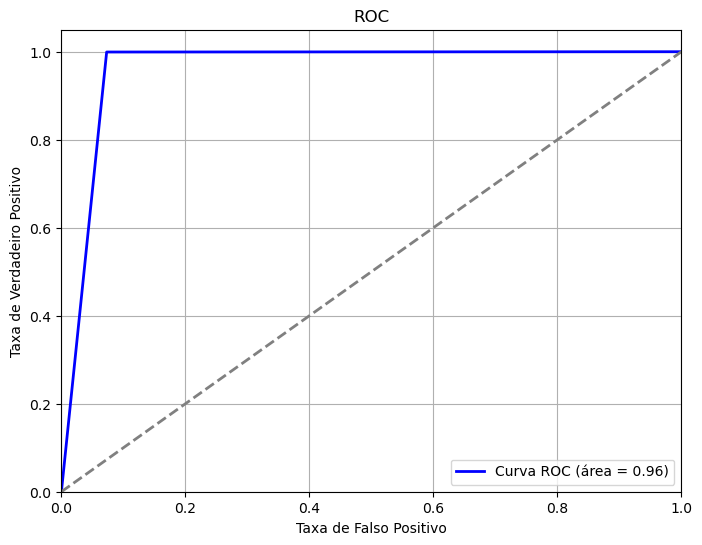

In [3]:
rede_cnn_1d(X,y,1)

Epoch 1/20
302/302 [==============================] - 75s 244ms/step - loss: 0.1435 - accuracy: 0.9604 - val_loss: 0.1426 - val_accuracy: 0.9502
Epoch 2/20
302/302 [==============================] - 74s 244ms/step - loss: 0.0594 - accuracy: 0.9781 - val_loss: 0.0404 - val_accuracy: 0.9879
Epoch 3/20
302/302 [==============================] - 73s 240ms/step - loss: 0.0403 - accuracy: 0.9868 - val_loss: 0.0341 - val_accuracy: 0.9904
Epoch 4/20
302/302 [==============================] - 73s 241ms/step - loss: 0.0303 - accuracy: 0.9883 - val_loss: 0.0235 - val_accuracy: 0.9919
Epoch 5/20
302/302 [==============================] - 73s 241ms/step - loss: 0.0197 - accuracy: 0.9935 - val_loss: 0.0177 - val_accuracy: 0.9941
Epoch 6/20
302/302 [==============================] - 75s 248ms/step - loss: 0.0215 - accuracy: 0.9927 - val_loss: 0.0147 - val_accuracy: 0.9960
Epoch 7/20
302/302 [==============================] - 73s 242ms/step - loss: 0.0133 - accuracy: 0.9952 - val_loss: 0.0124 - val_ac

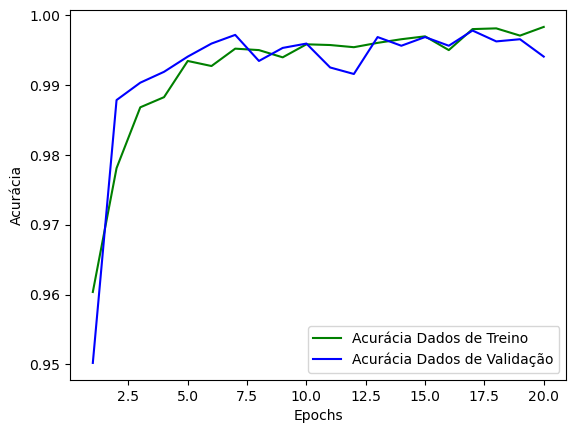

101/101 [==============================] - 4s 35ms/step


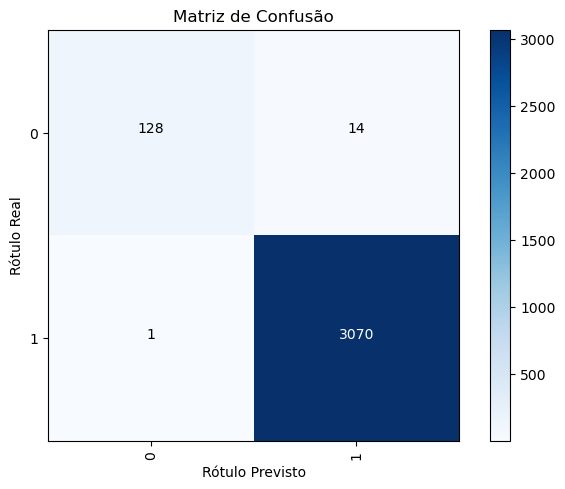

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       142
           1       1.00      1.00      1.00      3071

    accuracy                           1.00      3213
   macro avg       0.99      0.95      0.97      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9434019117254892


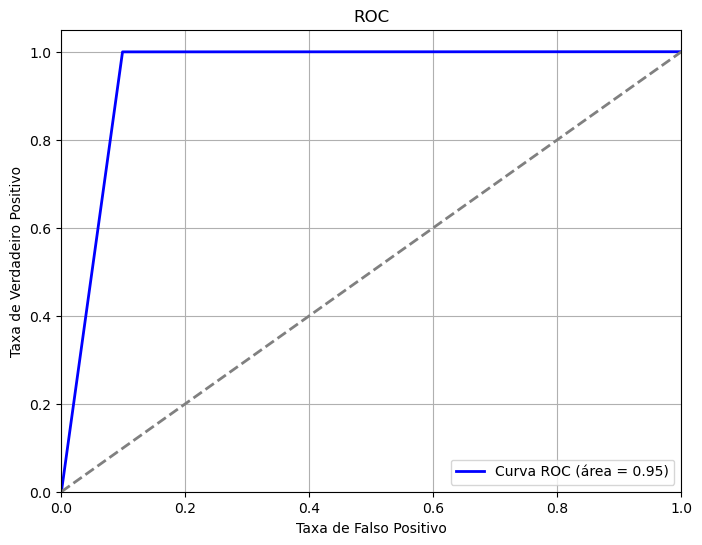

In [4]:
rede_cnn_1d(X,y,2)

Epoch 1/20
302/302 [==============================] - 74s 243ms/step - loss: 0.1490 - accuracy: 0.9613 - val_loss: 0.0739 - val_accuracy: 0.9729
Epoch 2/20
302/302 [==============================] - 73s 241ms/step - loss: 0.0582 - accuracy: 0.9808 - val_loss: 0.0441 - val_accuracy: 0.9882
Epoch 3/20
302/302 [==============================] - 73s 242ms/step - loss: 0.0371 - accuracy: 0.9872 - val_loss: 0.0382 - val_accuracy: 0.9919
Epoch 4/20
302/302 [==============================] - 72s 240ms/step - loss: 0.0266 - accuracy: 0.9905 - val_loss: 0.0256 - val_accuracy: 0.9941
Epoch 5/20
302/302 [==============================] - 72s 237ms/step - loss: 0.0150 - accuracy: 0.9950 - val_loss: 0.0280 - val_accuracy: 0.9894
Epoch 6/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0904 - val_accuracy: 0.9776
Epoch 7/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0253 - accuracy: 0.9921 - val_loss: 0.0224 - val_ac

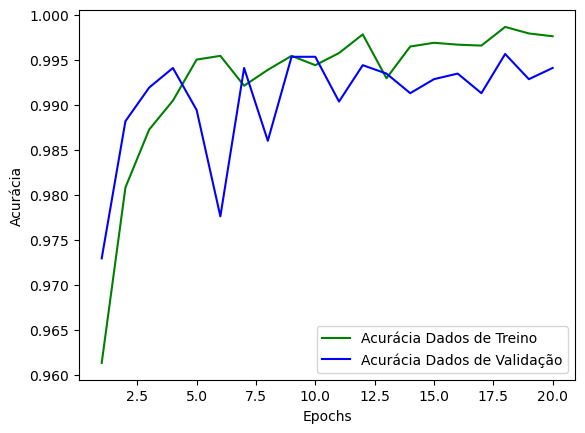

101/101 [==============================] - 3s 34ms/step


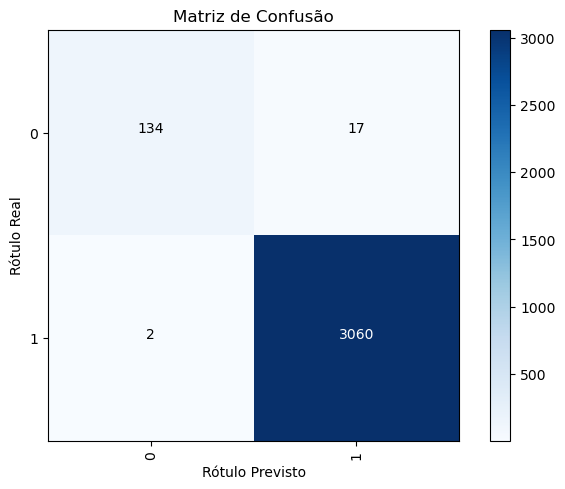

              precision    recall  f1-score   support

           0       0.99      0.89      0.93       151
           1       0.99      1.00      1.00      3062

    accuracy                           0.99      3213
   macro avg       0.99      0.94      0.97      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9321073725574888


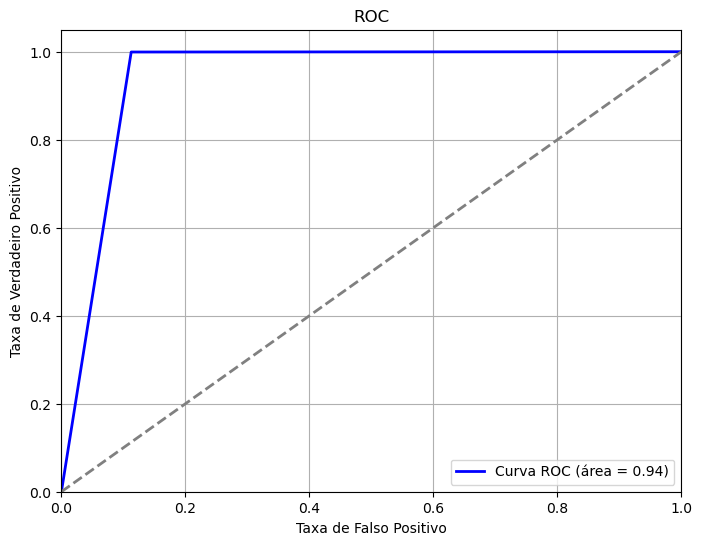

In [5]:
rede_cnn_1d(X,y,3)

Epoch 1/20
302/302 [==============================] - 72s 236ms/step - loss: 0.1382 - accuracy: 0.9588 - val_loss: 0.0608 - val_accuracy: 0.9838
Epoch 2/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.0390 - val_accuracy: 0.9872
Epoch 3/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0378 - accuracy: 0.9878 - val_loss: 0.0333 - val_accuracy: 0.9863
Epoch 4/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0259 - accuracy: 0.9909 - val_loss: 0.0251 - val_accuracy: 0.9913
Epoch 5/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0191 - accuracy: 0.9926 - val_loss: 0.0245 - val_accuracy: 0.9928
Epoch 6/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0167 - accuracy: 0.9941 - val_loss: 0.0318 - val_accuracy: 0.9925
Epoch 7/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.0297 - val_ac

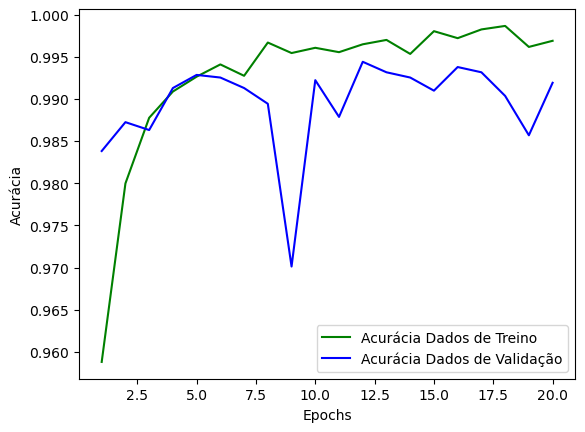

101/101 [==============================] - 4s 34ms/step


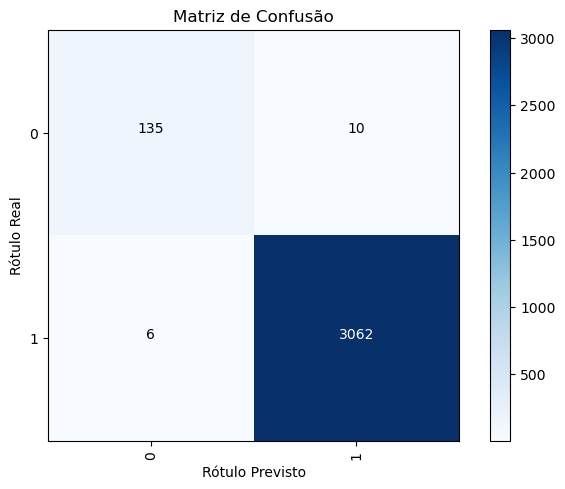

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       145
           1       1.00      1.00      1.00      3068

    accuracy                           1.00      3213
   macro avg       0.98      0.96      0.97      3213
weighted avg       0.99      1.00      0.99      3213

MCC = 0.9415514843363988


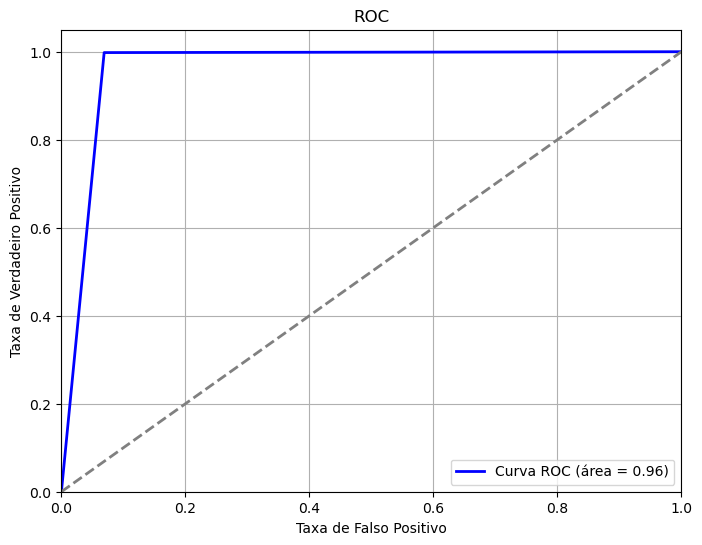

In [6]:
rede_cnn_1d(X,y,4)

Epoch 1/20
302/302 [==============================] - 73s 240ms/step - loss: 0.1603 - accuracy: 0.9547 - val_loss: 0.1492 - val_accuracy: 0.9511
Epoch 2/20
302/302 [==============================] - 72s 239ms/step - loss: 0.0760 - accuracy: 0.9726 - val_loss: 0.0417 - val_accuracy: 0.9829
Epoch 3/20
302/302 [==============================] - 72s 239ms/step - loss: 0.0444 - accuracy: 0.9859 - val_loss: 0.0869 - val_accuracy: 0.9729
Epoch 4/20
302/302 [==============================] - 72s 239ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.0263 - val_accuracy: 0.9916
Epoch 5/20
302/302 [==============================] - 72s 239ms/step - loss: 0.0306 - accuracy: 0.9894 - val_loss: 0.0211 - val_accuracy: 0.9925
Epoch 6/20
302/302 [==============================] - 72s 239ms/step - loss: 0.0168 - accuracy: 0.9944 - val_loss: 0.0216 - val_accuracy: 0.9925
Epoch 7/20
302/302 [==============================] - 72s 239ms/step - loss: 0.0169 - accuracy: 0.9939 - val_loss: 0.0134 - val_ac

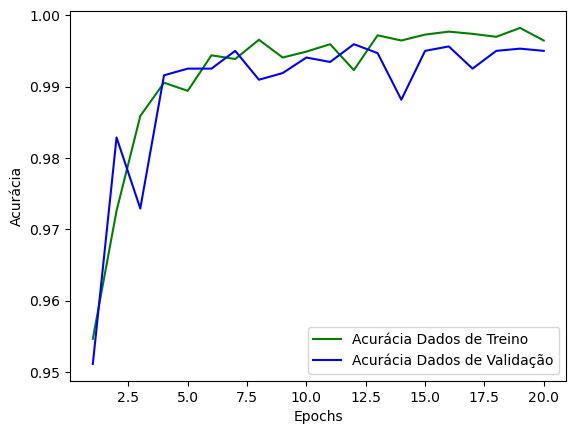

101/101 [==============================] - 4s 34ms/step


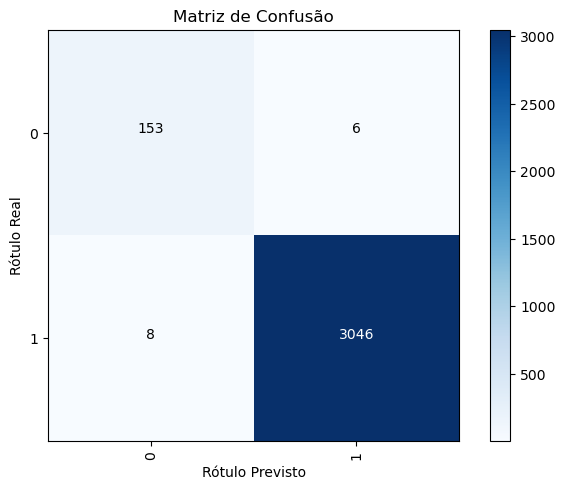

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       159
           1       1.00      1.00      1.00      3054

    accuracy                           1.00      3213
   macro avg       0.97      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9539779041754457


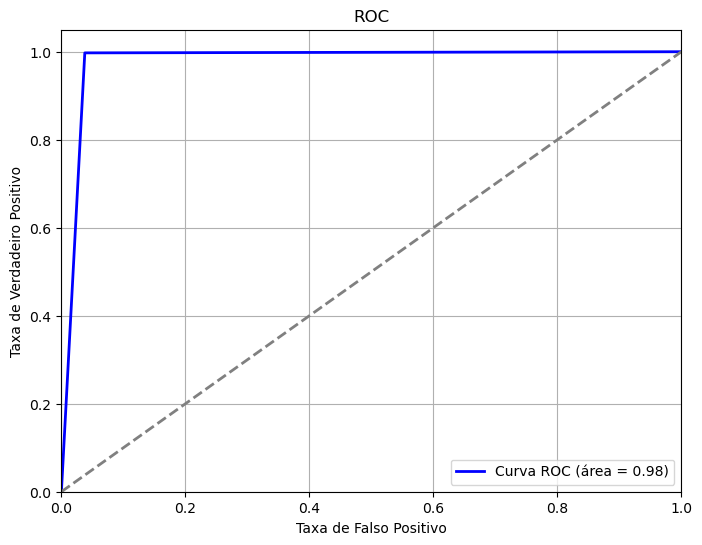

In [7]:
rede_cnn_1d(X,y,5)

Epoch 1/20
302/302 [==============================] - 73s 240ms/step - loss: 0.1518 - accuracy: 0.9596 - val_loss: 0.0696 - val_accuracy: 0.9717
Epoch 2/20
302/302 [==============================] - 73s 240ms/step - loss: 0.0618 - accuracy: 0.9815 - val_loss: 0.0632 - val_accuracy: 0.9804
Epoch 3/20
302/302 [==============================] - 73s 241ms/step - loss: 0.0478 - accuracy: 0.9856 - val_loss: 0.0327 - val_accuracy: 0.9872
Epoch 4/20
302/302 [==============================] - 72s 240ms/step - loss: 0.0307 - accuracy: 0.9900 - val_loss: 0.0297 - val_accuracy: 0.9897
Epoch 5/20
302/302 [==============================] - 73s 241ms/step - loss: 0.0291 - accuracy: 0.9898 - val_loss: 0.0250 - val_accuracy: 0.9938
Epoch 6/20
302/302 [==============================] - 73s 240ms/step - loss: 0.0404 - accuracy: 0.9894 - val_loss: 0.0220 - val_accuracy: 0.9922
Epoch 7/20
302/302 [==============================] - 73s 240ms/step - loss: 0.0171 - accuracy: 0.9935 - val_loss: 0.0097 - val_ac

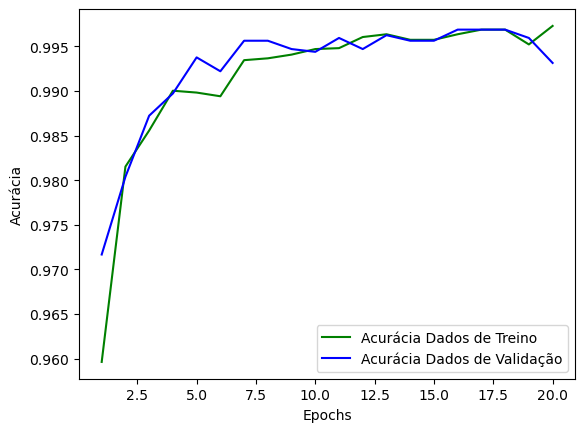

101/101 [==============================] - 4s 34ms/step


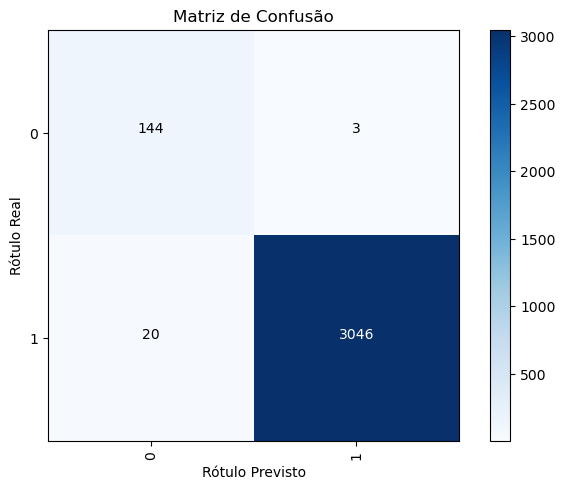

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       147
           1       1.00      0.99      1.00      3066

    accuracy                           0.99      3213
   macro avg       0.94      0.99      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9238205111078487


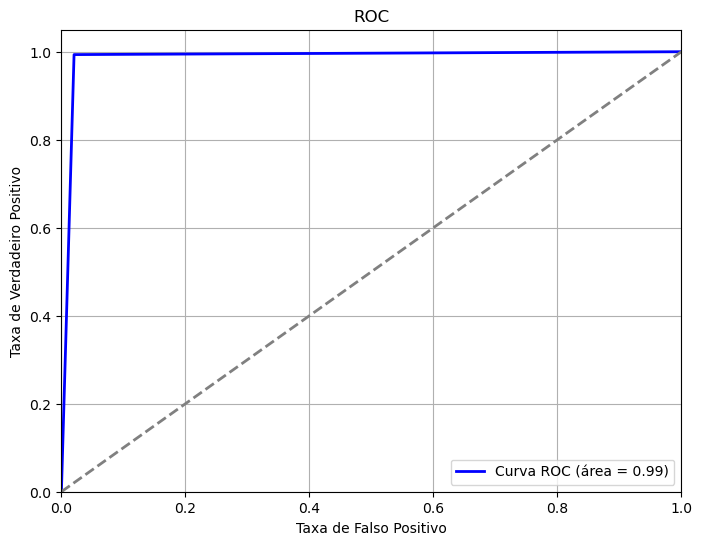

In [8]:
rede_cnn_1d(X,y,6)

Epoch 1/20
302/302 [==============================] - 72s 237ms/step - loss: 0.1443 - accuracy: 0.9593 - val_loss: 0.0927 - val_accuracy: 0.9676
Epoch 2/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0754 - accuracy: 0.9692 - val_loss: 0.0629 - val_accuracy: 0.9767
Epoch 3/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0477 - accuracy: 0.9842 - val_loss: 0.0238 - val_accuracy: 0.9932
Epoch 4/20
302/302 [==============================] - 71s 237ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.0255 - val_accuracy: 0.9932
Epoch 5/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0148 - val_accuracy: 0.9953
Epoch 6/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0201 - accuracy: 0.9941 - val_loss: 0.0166 - val_accuracy: 0.9928
Epoch 7/20
302/302 [==============================] - 71s 236ms/step - loss: 0.0183 - accuracy: 0.9942 - val_loss: 0.0207 - val_ac

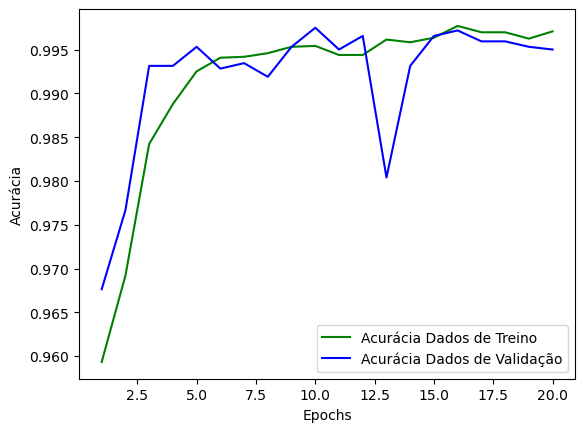

101/101 [==============================] - 4s 36ms/step


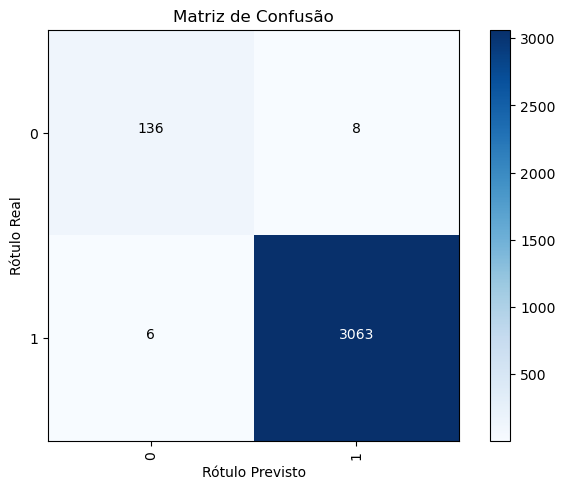

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       144
           1       1.00      1.00      1.00      3069

    accuracy                           1.00      3213
   macro avg       0.98      0.97      0.97      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.948794348265335


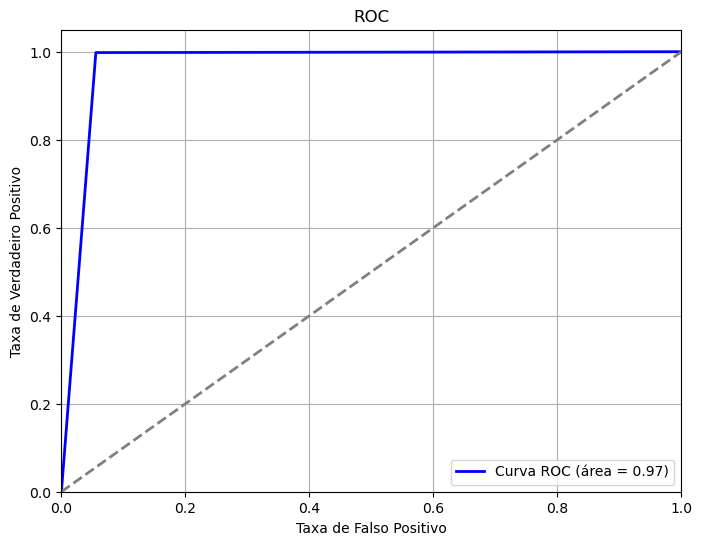

In [9]:
rede_cnn_1d(X,y,7)

Epoch 1/20
302/302 [==============================] - 74s 241ms/step - loss: 0.1277 - accuracy: 0.9625 - val_loss: 0.0807 - val_accuracy: 0.9717
Epoch 2/20
302/302 [==============================] - 78s 257ms/step - loss: 0.0623 - accuracy: 0.9790 - val_loss: 0.0588 - val_accuracy: 0.9841
Epoch 3/20
302/302 [==============================] - 79s 262ms/step - loss: 0.0341 - accuracy: 0.9884 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 4/20
302/302 [==============================] - 79s 263ms/step - loss: 0.0275 - accuracy: 0.9900 - val_loss: 0.0276 - val_accuracy: 0.9897
Epoch 5/20
302/302 [==============================] - 81s 268ms/step - loss: 0.0172 - accuracy: 0.9933 - val_loss: 0.0184 - val_accuracy: 0.9922
Epoch 6/20
302/302 [==============================] - 74s 244ms/step - loss: 0.0162 - accuracy: 0.9948 - val_loss: 0.0179 - val_accuracy: 0.9950
Epoch 7/20
302/302 [==============================] - 127s 421ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.0196 - val_a

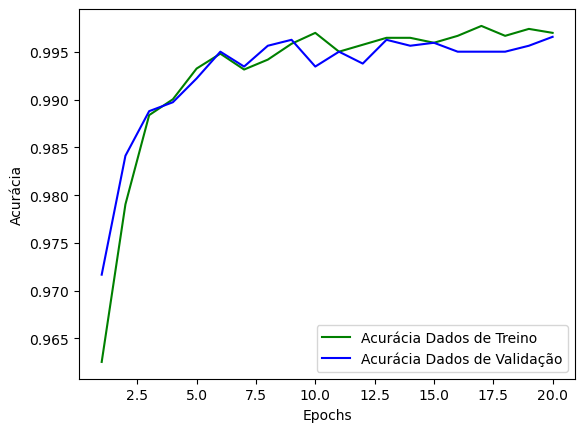

101/101 [==============================] - 8s 76ms/step


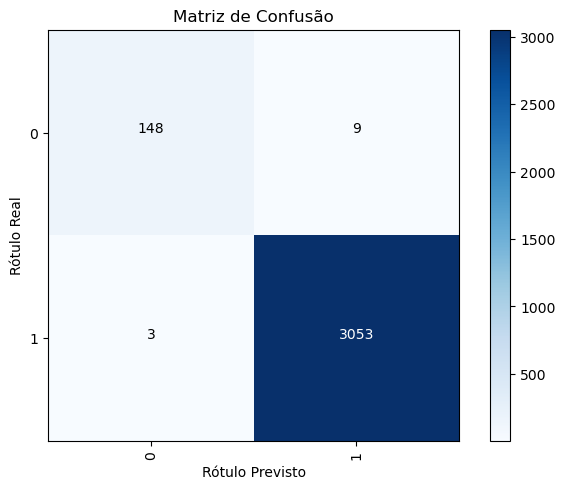

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       157
           1       1.00      1.00      1.00      3056

    accuracy                           1.00      3213
   macro avg       0.99      0.97      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9592791377555674


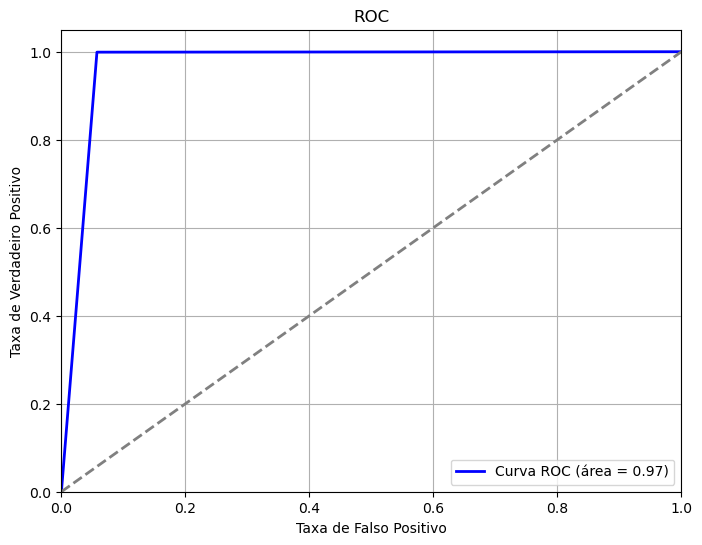

In [10]:
rede_cnn_1d(X,y,8)

Epoch 1/20
302/302 [==============================] - 145s 472ms/step - loss: 0.1540 - accuracy: 0.9589 - val_loss: 0.0638 - val_accuracy: 0.9723
Epoch 2/20
302/302 [==============================] - 112s 371ms/step - loss: 0.0619 - accuracy: 0.9789 - val_loss: 0.0332 - val_accuracy: 0.9900
Epoch 3/20
302/302 [==============================] - 138s 456ms/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.0382 - val_accuracy: 0.9860
Epoch 4/20
302/302 [==============================] - 136s 451ms/step - loss: 0.0222 - accuracy: 0.9927 - val_loss: 0.0137 - val_accuracy: 0.9944
Epoch 5/20
302/302 [==============================] - 141s 466ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0117 - val_accuracy: 0.9950
Epoch 6/20
302/302 [==============================] - 142s 471ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0137 - val_accuracy: 0.9938
Epoch 7/20
302/302 [==============================] - 139s 459ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0085 -

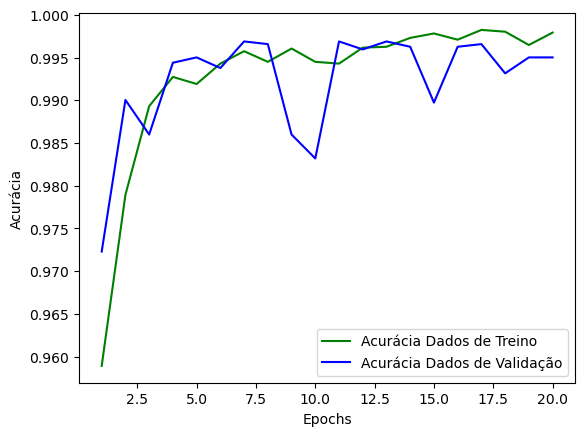

101/101 [==============================] - 7s 67ms/step


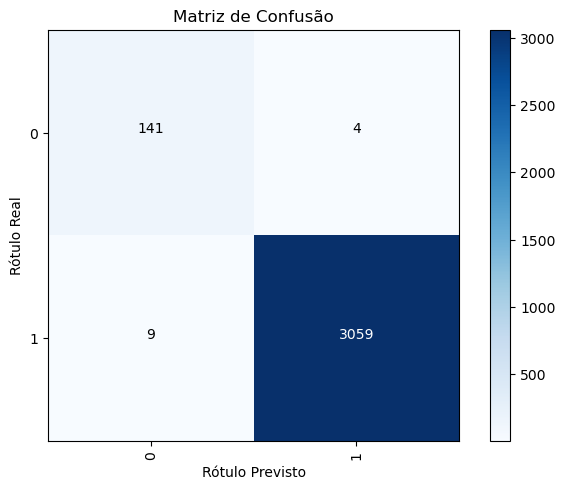

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       145
           1       1.00      1.00      1.00      3068

    accuracy                           1.00      3213
   macro avg       0.97      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9539630053172752


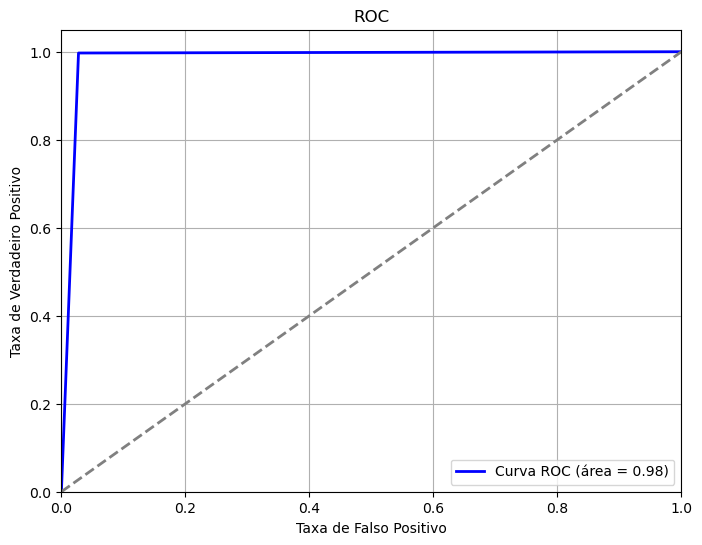

In [11]:
rede_cnn_1d(X,y,9)

Epoch 1/20
302/302 [==============================] - 139s 450ms/step - loss: 0.1559 - accuracy: 0.9547 - val_loss: 0.0736 - val_accuracy: 0.9726
Epoch 2/20
302/302 [==============================] - 136s 450ms/step - loss: 0.0767 - accuracy: 0.9745 - val_loss: 0.0748 - val_accuracy: 0.9879
Epoch 3/20
302/302 [==============================] - 137s 453ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0310 - val_accuracy: 0.9879
Epoch 4/20
302/302 [==============================] - 136s 450ms/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.0162 - val_accuracy: 0.9938
Epoch 5/20
302/302 [==============================] - 138s 457ms/step - loss: 0.0196 - accuracy: 0.9922 - val_loss: 0.0164 - val_accuracy: 0.9944
Epoch 6/20
302/302 [==============================] - 119s 394ms/step - loss: 0.0157 - accuracy: 0.9941 - val_loss: 0.0159 - val_accuracy: 0.9935
Epoch 7/20
302/302 [==============================] - 115s 382ms/step - loss: 0.0146 - accuracy: 0.9945 - val_loss: 0.0144 -

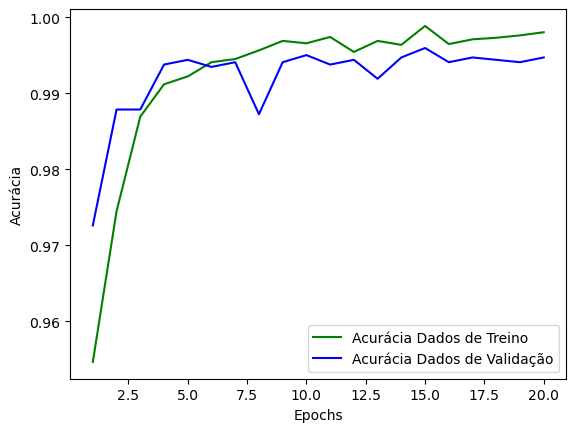

101/101 [==============================] - 7s 67ms/step


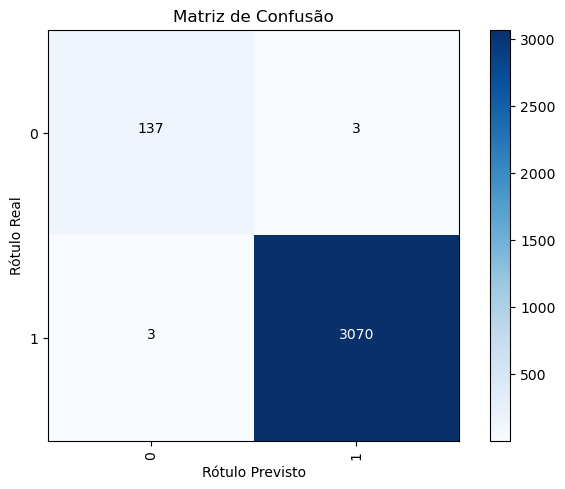

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       140
           1       1.00      1.00      1.00      3073

    accuracy                           1.00      3213
   macro avg       0.99      0.99      0.99      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9775951838594208


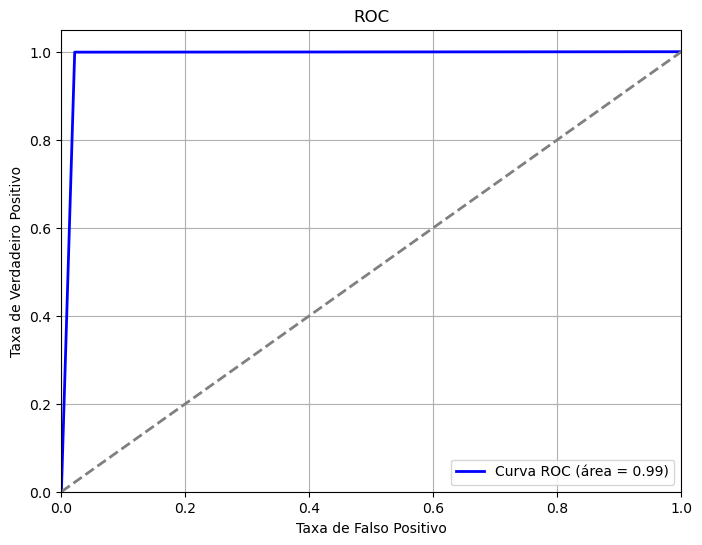

In [12]:
rede_cnn_1d(X,y,10)

Epoch 1/20
302/302 [==============================] - 138s 449ms/step - loss: 0.1483 - accuracy: 0.9528 - val_loss: 0.0889 - val_accuracy: 0.9508
Epoch 2/20
302/302 [==============================] - 132s 437ms/step - loss: 0.0885 - accuracy: 0.9642 - val_loss: 0.0649 - val_accuracy: 0.9735
Epoch 3/20
302/302 [==============================] - 132s 438ms/step - loss: 0.0642 - accuracy: 0.9795 - val_loss: 0.0907 - val_accuracy: 0.9670
Epoch 4/20
302/302 [==============================] - 134s 445ms/step - loss: 0.0352 - accuracy: 0.9884 - val_loss: 0.0260 - val_accuracy: 0.9900
Epoch 5/20
302/302 [==============================] - 134s 445ms/step - loss: 0.0257 - accuracy: 0.9898 - val_loss: 0.0194 - val_accuracy: 0.9925
Epoch 6/20
302/302 [==============================] - 134s 444ms/step - loss: 0.0241 - accuracy: 0.9919 - val_loss: 0.0978 - val_accuracy: 0.9723
Epoch 7/20
302/302 [==============================] - 130s 430ms/step - loss: 0.0191 - accuracy: 0.9937 - val_loss: 0.0149 -

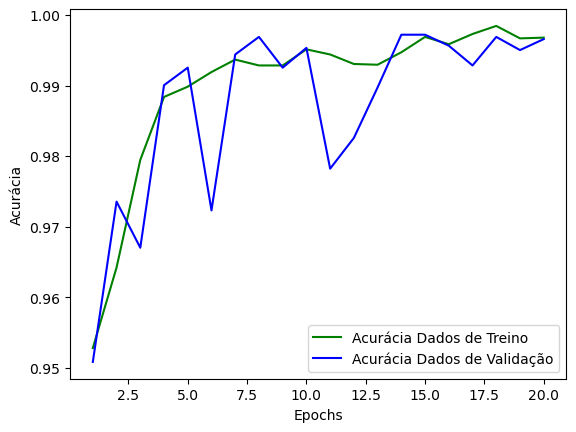

101/101 [==============================] - 7s 67ms/step


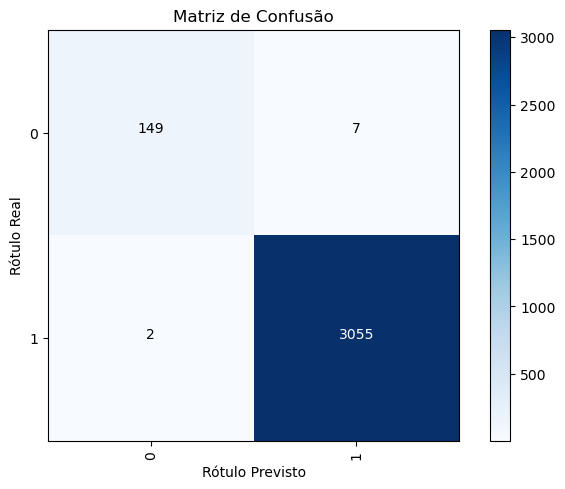

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       156
           1       1.00      1.00      1.00      3057

    accuracy                           1.00      3213
   macro avg       0.99      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9693554139696384


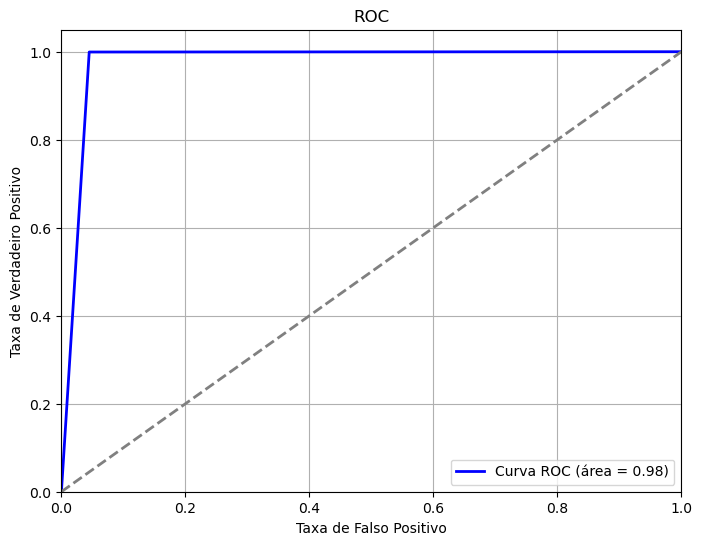

In [13]:
rede_cnn_1d(X,y,11)

Epoch 1/20
302/302 [==============================] - 136s 443ms/step - loss: 0.1494 - accuracy: 0.9566 - val_loss: 0.0769 - val_accuracy: 0.9648
Epoch 2/20
302/302 [==============================] - 136s 449ms/step - loss: 0.0712 - accuracy: 0.9762 - val_loss: 0.0351 - val_accuracy: 0.9925
Epoch 3/20
302/302 [==============================] - 134s 443ms/step - loss: 0.0332 - accuracy: 0.9891 - val_loss: 0.0246 - val_accuracy: 0.9938
Epoch 4/20
302/302 [==============================] - 134s 443ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0126 - val_accuracy: 0.9966
Epoch 5/20
302/302 [==============================] - 129s 428ms/step - loss: 0.0227 - accuracy: 0.9920 - val_loss: 0.0140 - val_accuracy: 0.9956
Epoch 6/20
302/302 [==============================] - 129s 426ms/step - loss: 0.0159 - accuracy: 0.9938 - val_loss: 0.0130 - val_accuracy: 0.9956
Epoch 7/20
302/302 [==============================] - 134s 443ms/step - loss: 0.0140 - accuracy: 0.9948 - val_loss: 0.0103 -

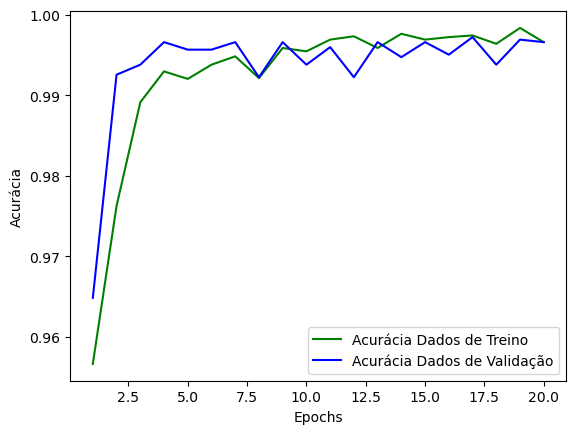

101/101 [==============================] - 7s 68ms/step


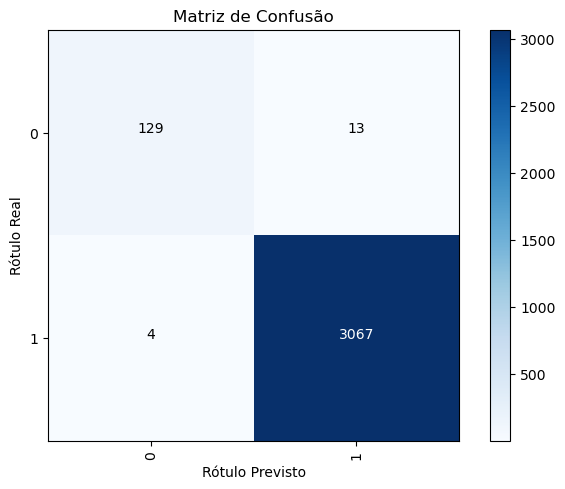

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       142
           1       1.00      1.00      1.00      3071

    accuracy                           0.99      3213
   macro avg       0.98      0.95      0.97      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9359683072095991


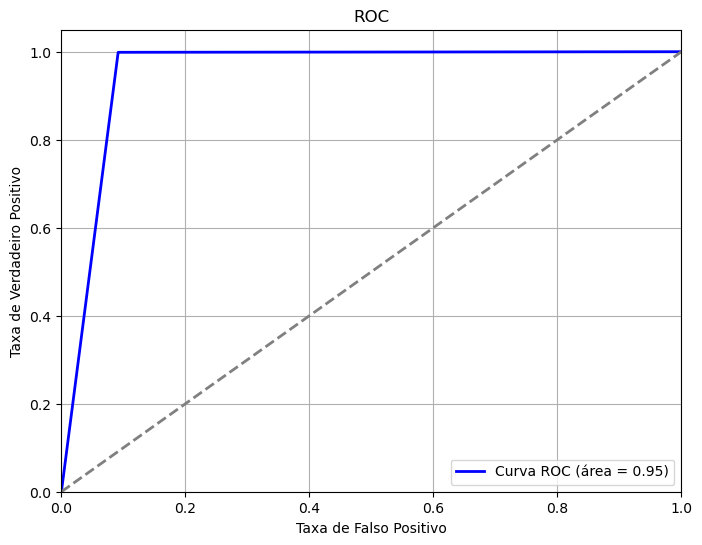

In [14]:
rede_cnn_1d(X,y,12)

Epoch 1/20
302/302 [==============================] - 137s 446ms/step - loss: 0.1497 - accuracy: 0.9573 - val_loss: 0.0687 - val_accuracy: 0.9742
Epoch 2/20
302/302 [==============================] - 129s 428ms/step - loss: 0.0698 - accuracy: 0.9761 - val_loss: 0.0388 - val_accuracy: 0.9894
Epoch 3/20
302/302 [==============================] - 135s 446ms/step - loss: 0.0379 - accuracy: 0.9877 - val_loss: 0.0224 - val_accuracy: 0.9922
Epoch 4/20
302/302 [==============================] - 135s 446ms/step - loss: 0.0290 - accuracy: 0.9895 - val_loss: 0.0259 - val_accuracy: 0.9944
Epoch 5/20
302/302 [==============================] - 135s 446ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.0180 - val_accuracy: 0.9935
Epoch 6/20
302/302 [==============================] - 134s 445ms/step - loss: 0.0173 - accuracy: 0.9943 - val_loss: 0.0157 - val_accuracy: 0.9944
Epoch 7/20
302/302 [==============================] - 132s 437ms/step - loss: 0.0184 - accuracy: 0.9930 - val_loss: 0.0148 -

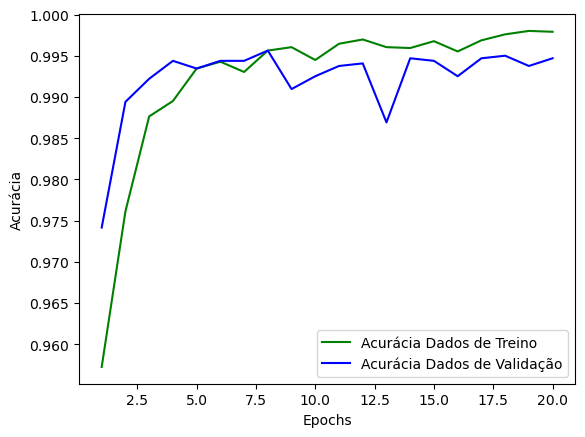

101/101 [==============================] - 7s 69ms/step


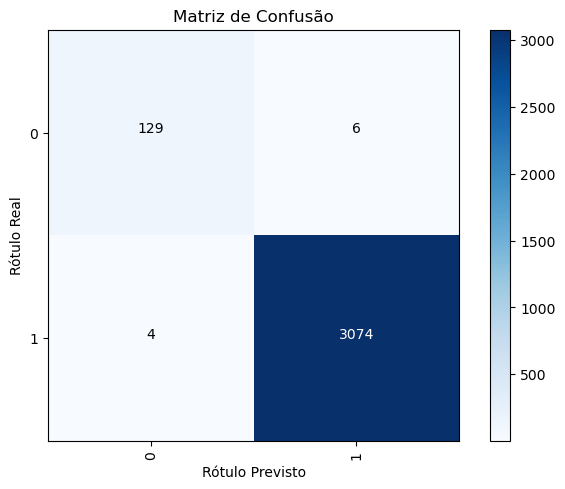

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       135
           1       1.00      1.00      1.00      3078

    accuracy                           1.00      3213
   macro avg       0.98      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9610919005133002


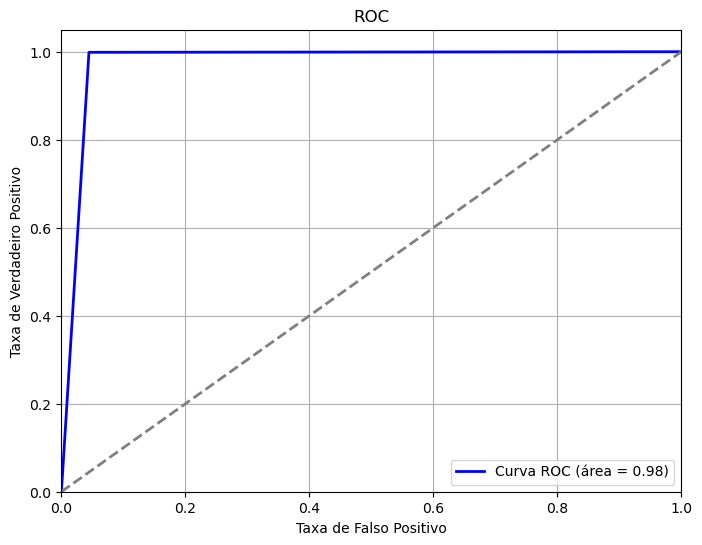

In [15]:
rede_cnn_1d(X,y,13)

Epoch 1/20
302/302 [==============================] - 139s 452ms/step - loss: 0.1386 - accuracy: 0.9629 - val_loss: 0.0639 - val_accuracy: 0.9757
Epoch 2/20
302/302 [==============================] - 132s 437ms/step - loss: 0.0542 - accuracy: 0.9809 - val_loss: 0.1024 - val_accuracy: 0.9645
Epoch 3/20
302/302 [==============================] - 136s 449ms/step - loss: 0.0360 - accuracy: 0.9878 - val_loss: 0.0162 - val_accuracy: 0.9944
Epoch 4/20
302/302 [==============================] - 136s 450ms/step - loss: 0.0221 - accuracy: 0.9917 - val_loss: 0.0559 - val_accuracy: 0.9829
Epoch 5/20
302/302 [==============================] - 136s 449ms/step - loss: 0.0309 - accuracy: 0.9895 - val_loss: 0.0196 - val_accuracy: 0.9935
Epoch 6/20
302/302 [==============================] - 132s 436ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0123 - val_accuracy: 0.9960
Epoch 7/20
302/302 [==============================] - 135s 446ms/step - loss: 0.0136 - accuracy: 0.9948 - val_loss: 0.0118 -

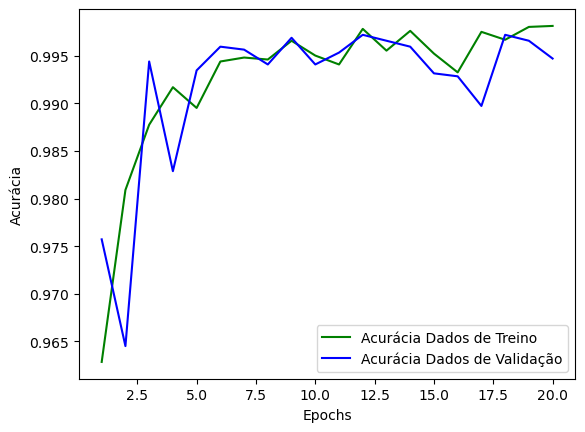

101/101 [==============================] - 7s 67ms/step


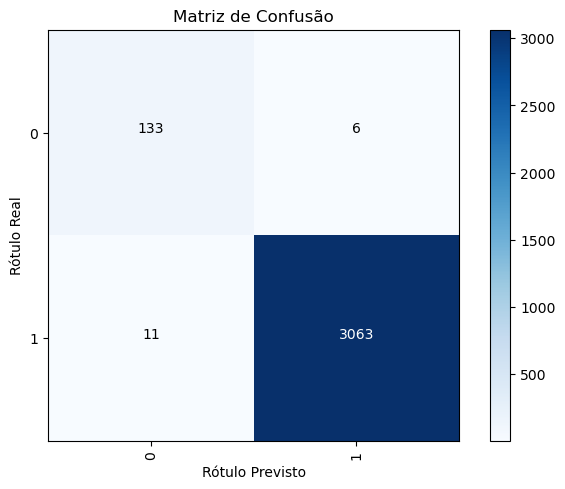

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       139
           1       1.00      1.00      1.00      3074

    accuracy                           0.99      3213
   macro avg       0.96      0.98      0.97      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9373229473999892


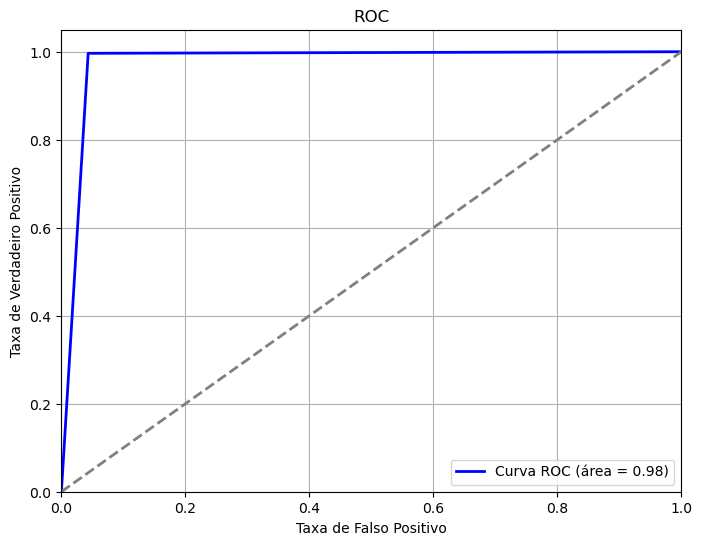

In [16]:
rede_cnn_1d(X,y,14)

Epoch 1/20
302/302 [==============================] - 133s 431ms/step - loss: 0.1542 - accuracy: 0.9591 - val_loss: 0.1086 - val_accuracy: 0.9546
Epoch 2/20
302/302 [==============================] - 134s 445ms/step - loss: 0.0706 - accuracy: 0.9775 - val_loss: 0.0383 - val_accuracy: 0.9910
Epoch 3/20
302/302 [==============================] - 133s 439ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0235 - val_accuracy: 0.9910
Epoch 4/20
302/302 [==============================] - 135s 447ms/step - loss: 0.0230 - accuracy: 0.9918 - val_loss: 0.0356 - val_accuracy: 0.9891
Epoch 5/20
302/302 [==============================] - 133s 439ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0278 - val_accuracy: 0.9900
Epoch 6/20
302/302 [==============================] - 135s 447ms/step - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.0160 - val_accuracy: 0.9947
Epoch 7/20
302/302 [==============================] - 133s 439ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0245 -

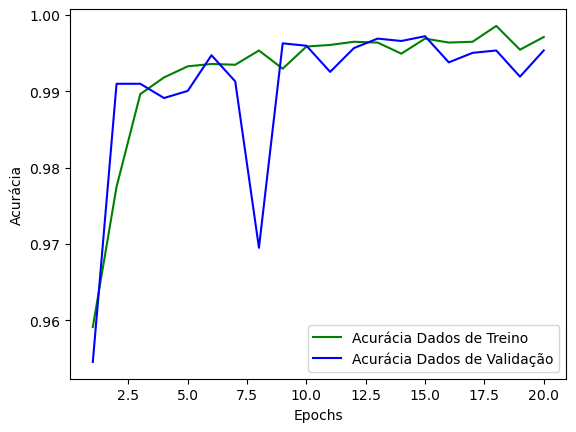

101/101 [==============================] - 7s 68ms/step


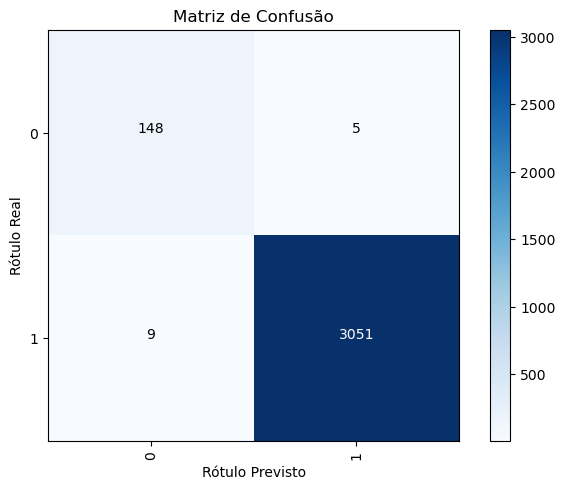

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       153
           1       1.00      1.00      1.00      3060

    accuracy                           1.00      3213
   macro avg       0.97      0.98      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9526375817295825


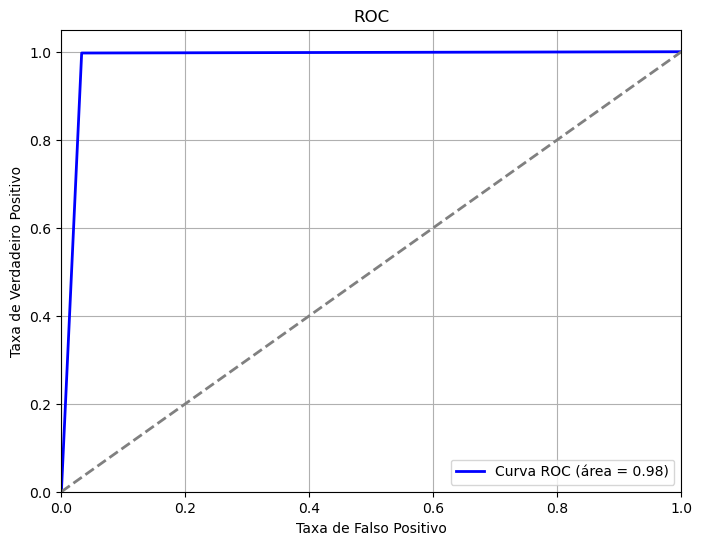

In [17]:
rede_cnn_1d(X,y,15)

Epoch 1/20
302/302 [==============================] - 138s 448ms/step - loss: 0.1589 - accuracy: 0.9540 - val_loss: 0.0991 - val_accuracy: 0.9477
Epoch 2/20
302/302 [==============================] - 135s 446ms/step - loss: 0.0881 - accuracy: 0.9661 - val_loss: 0.0592 - val_accuracy: 0.9804
Epoch 3/20
302/302 [==============================] - 135s 446ms/step - loss: 0.0575 - accuracy: 0.9800 - val_loss: 0.0342 - val_accuracy: 0.9872
Epoch 4/20
302/302 [==============================] - 135s 447ms/step - loss: 0.0344 - accuracy: 0.9897 - val_loss: 0.0245 - val_accuracy: 0.9910
Epoch 5/20
302/302 [==============================] - 129s 429ms/step - loss: 0.0282 - accuracy: 0.9914 - val_loss: 0.0285 - val_accuracy: 0.9897
Epoch 6/20
302/302 [==============================] - 132s 439ms/step - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.0186 - val_accuracy: 0.9928
Epoch 7/20
302/302 [==============================] - 135s 447ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0224 -

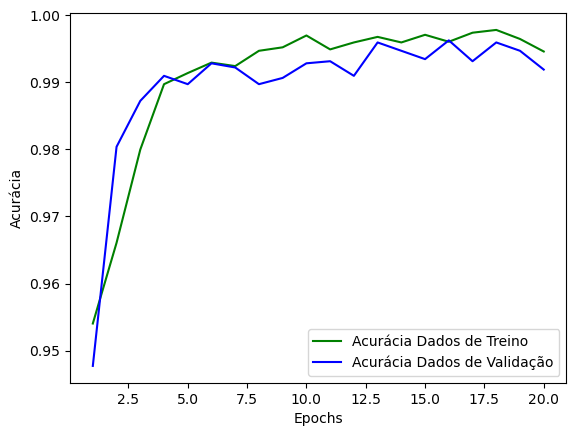

101/101 [==============================] - 4s 35ms/step


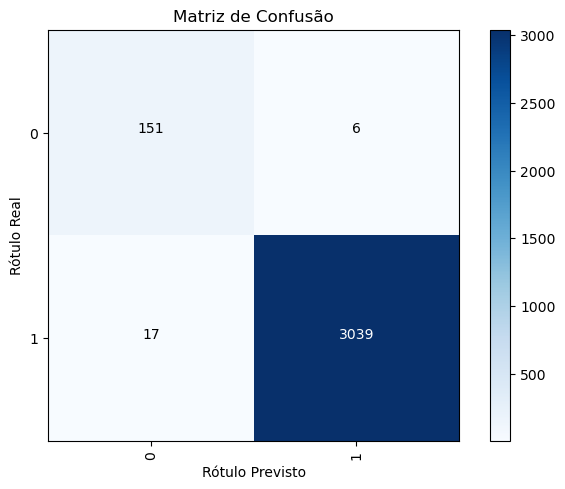

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       157
           1       1.00      0.99      1.00      3056

    accuracy                           0.99      3213
   macro avg       0.95      0.98      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9260540020002632


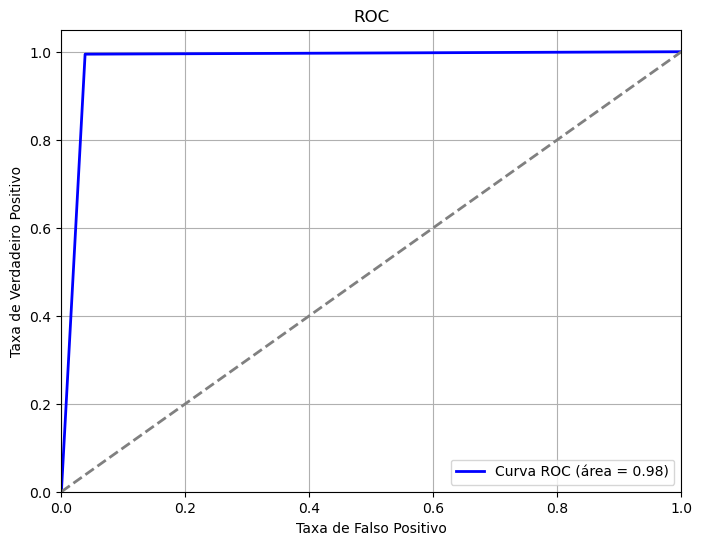

In [18]:
rede_cnn_1d(X,y,16)

Epoch 1/20
302/302 [==============================] - 72s 234ms/step - loss: 0.1361 - accuracy: 0.9612 - val_loss: 0.0938 - val_accuracy: 0.9717
Epoch 2/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0622 - accuracy: 0.9783 - val_loss: 0.0554 - val_accuracy: 0.9851
Epoch 3/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0374 - accuracy: 0.9879 - val_loss: 0.0359 - val_accuracy: 0.9882
Epoch 4/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0332 - val_accuracy: 0.9922
Epoch 5/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0257 - accuracy: 0.9909 - val_loss: 0.0240 - val_accuracy: 0.9941
Epoch 6/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0183 - accuracy: 0.9929 - val_loss: 0.0187 - val_accuracy: 0.9963
Epoch 7/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0253 - val_ac

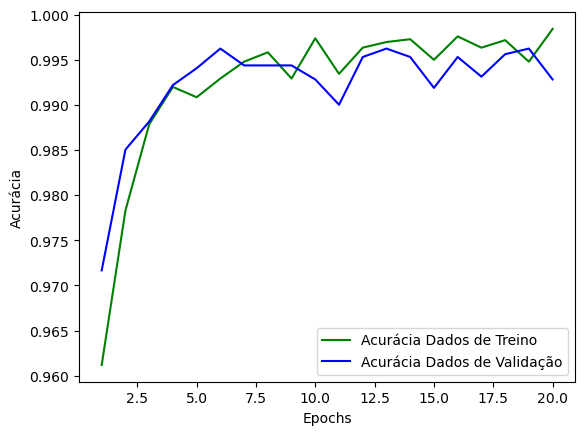

101/101 [==============================] - 4s 35ms/step


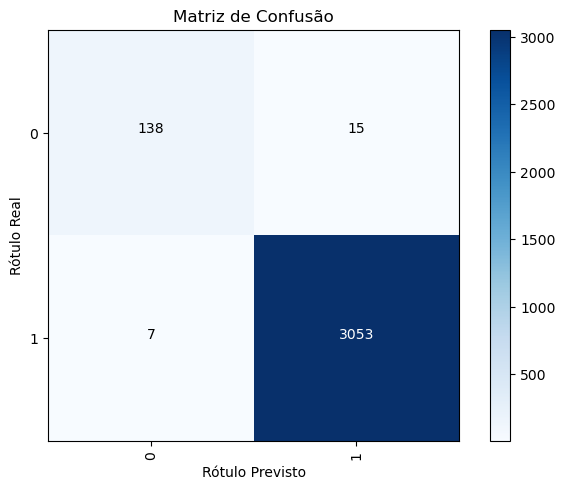

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       153
           1       1.00      1.00      1.00      3060

    accuracy                           0.99      3213
   macro avg       0.97      0.95      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9229528916431327


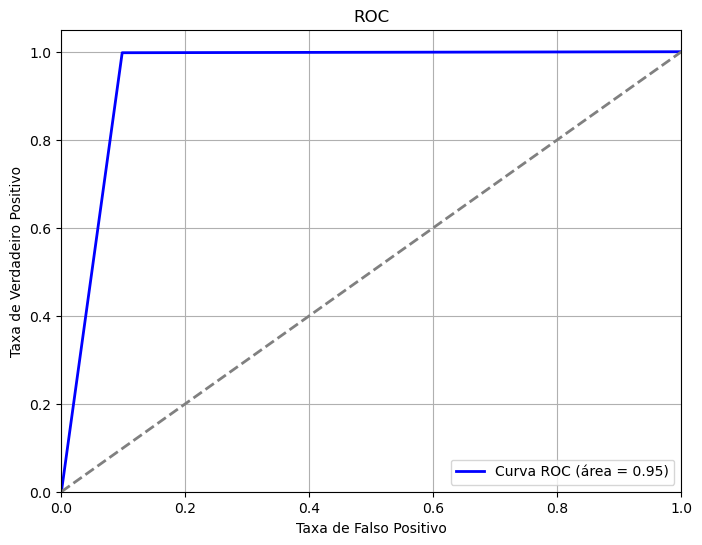

In [19]:
rede_cnn_1d(X,y,17)

Epoch 1/20
302/302 [==============================] - 72s 235ms/step - loss: 0.1374 - accuracy: 0.9542 - val_loss: 0.0946 - val_accuracy: 0.9639
Epoch 2/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0642 - accuracy: 0.9785 - val_loss: 0.0620 - val_accuracy: 0.9879
Epoch 3/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0382 - val_accuracy: 0.9913
Epoch 4/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0269 - accuracy: 0.9904 - val_loss: 0.0415 - val_accuracy: 0.9922
Epoch 5/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.0304 - val_accuracy: 0.9922
Epoch 6/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0240 - accuracy: 0.9914 - val_loss: 0.0251 - val_accuracy: 0.9950
Epoch 7/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0176 - accuracy: 0.9945 - val_loss: 0.0216 - val_ac

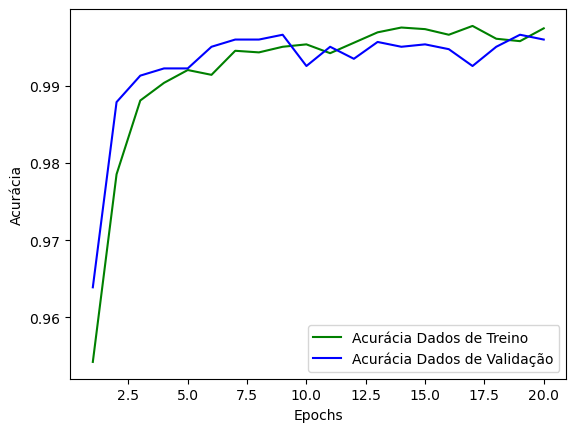

101/101 [==============================] - 4s 35ms/step


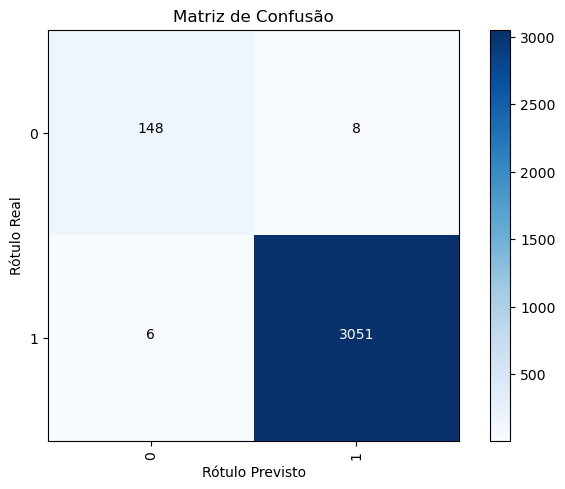

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       156
           1       1.00      1.00      1.00      3057

    accuracy                           1.00      3213
   macro avg       0.98      0.97      0.98      3213
weighted avg       1.00      1.00      1.00      3213

MCC = 0.9525716173268011


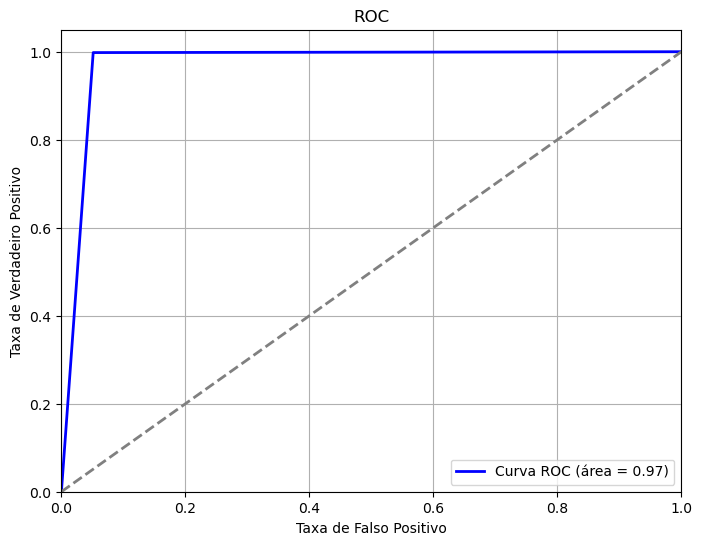

In [20]:
rede_cnn_1d(X,y,18)

Epoch 1/20
302/302 [==============================] - 72s 235ms/step - loss: 0.1476 - accuracy: 0.9588 - val_loss: 0.0806 - val_accuracy: 0.9686
Epoch 2/20
302/302 [==============================] - 71s 235ms/step - loss: 0.0673 - accuracy: 0.9770 - val_loss: 0.0384 - val_accuracy: 0.9832
Epoch 3/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0386 - accuracy: 0.9866 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 4/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0239 - accuracy: 0.9914 - val_loss: 0.0162 - val_accuracy: 0.9941
Epoch 5/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0224 - val_accuracy: 0.9932
Epoch 6/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0189 - accuracy: 0.9938 - val_loss: 0.0184 - val_accuracy: 0.9941
Epoch 7/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0147 - val_ac

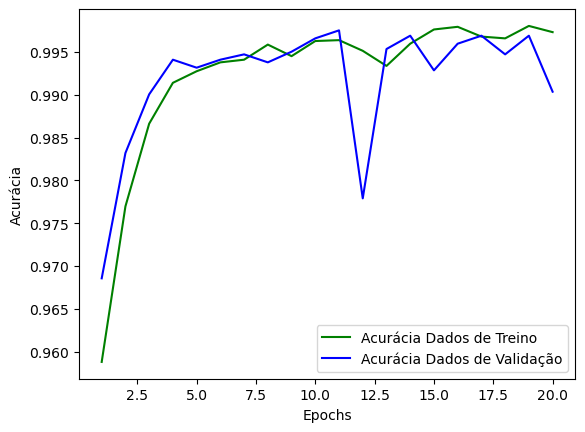

101/101 [==============================] - 4s 35ms/step


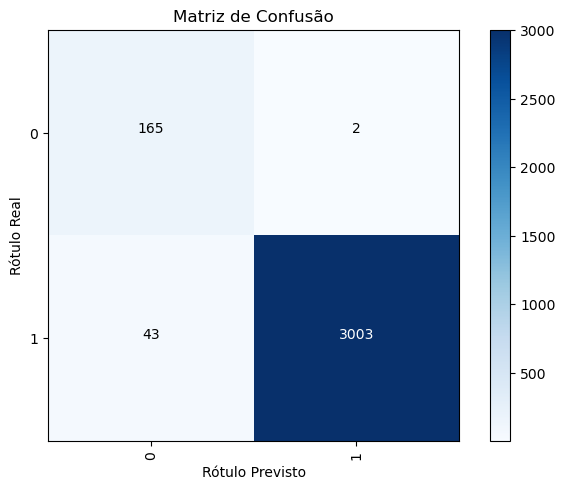

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       167
           1       1.00      0.99      0.99      3046

    accuracy                           0.99      3213
   macro avg       0.90      0.99      0.94      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.8785911034989365


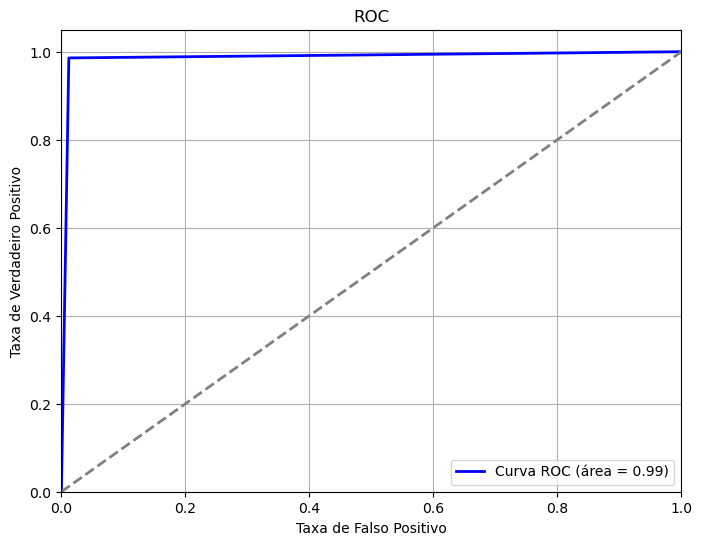

In [21]:
rede_cnn_1d(X,y,19)

Epoch 1/20
302/302 [==============================] - 71s 234ms/step - loss: 0.1460 - accuracy: 0.9584 - val_loss: 0.0805 - val_accuracy: 0.9689
Epoch 2/20
302/302 [==============================] - 70s 233ms/step - loss: 0.0713 - accuracy: 0.9776 - val_loss: 0.0278 - val_accuracy: 0.9925
Epoch 3/20
302/302 [==============================] - 70s 233ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0206 - val_accuracy: 0.9932
Epoch 4/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0229 - accuracy: 0.9920 - val_loss: 0.0125 - val_accuracy: 0.9941
Epoch 5/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0254 - accuracy: 0.9915 - val_loss: 0.0188 - val_accuracy: 0.9932
Epoch 6/20
302/302 [==============================] - 70s 233ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0091 - val_accuracy: 0.9972
Epoch 7/20
302/302 [==============================] - 71s 234ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 0.0158 - val_ac

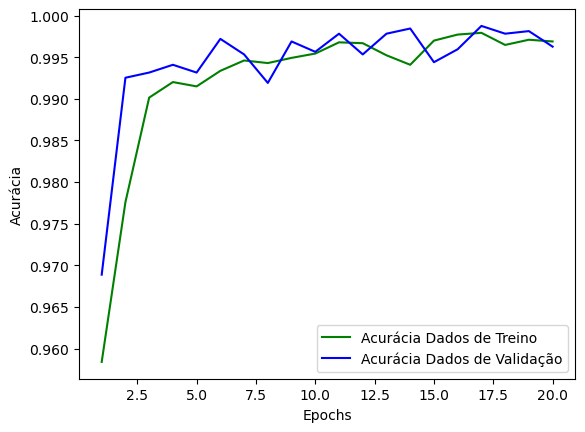

101/101 [==============================] - 4s 34ms/step


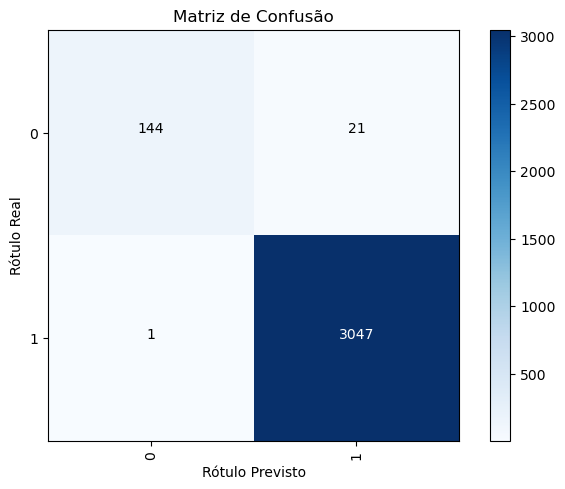

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       165
           1       0.99      1.00      1.00      3048

    accuracy                           0.99      3213
   macro avg       0.99      0.94      0.96      3213
weighted avg       0.99      0.99      0.99      3213

MCC = 0.9275835277562031


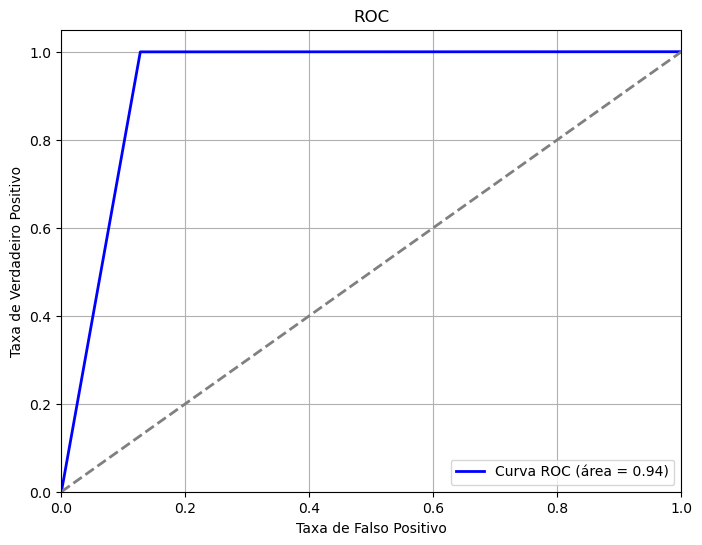

In [22]:
rede_cnn_1d(X,y,20)